In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Debasish/personal/DS_city/Decodr_/Dataset/13720_18513_bundle_archive/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

We have total 1338 records and 7 fetures in out dataset.

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


So we have no missing values or no-null values present in our dataset
*we have below categorical fetures
1. sex
2. somker
3. region

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


We can see that 
1. age is ranging in between 18 to 64



In [8]:
df[['sex','smoker','region']]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


We can see from avove that region feature has four levels.southeast,southwest,northeast and northwest

## Univariate Analysis

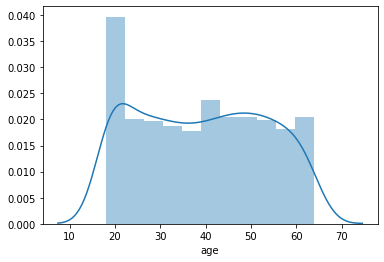

In [9]:
sns.distplot(df['age'])

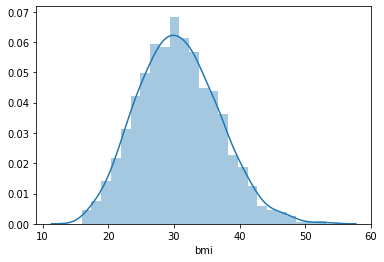

In [10]:
sns.distplot(df['bmi'])

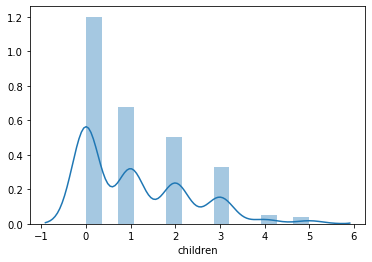

In [11]:
sns.distplot(df['children'])

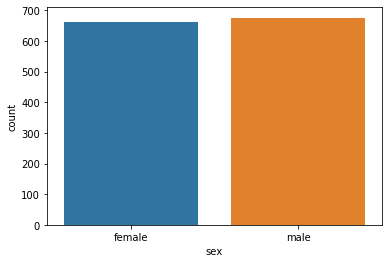

In [12]:
sns.countplot(df['sex'])

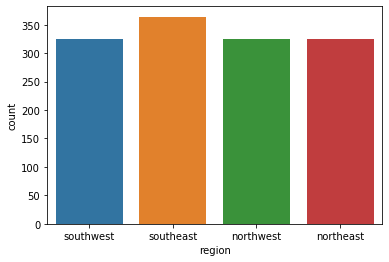

In [13]:
sns.countplot(df['region'])

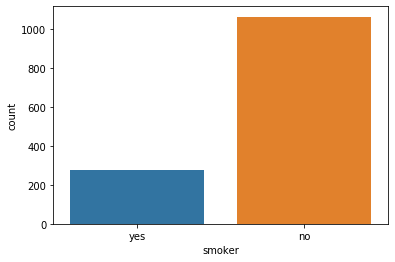

In [14]:
sns.countplot(df['smoker'])

### Covert Categorical variables into numeric by using one hot encoding

In [15]:
df=pd.get_dummies(df)

In [16]:
df.shape

(1338, 12)

In [17]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [18]:
df.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


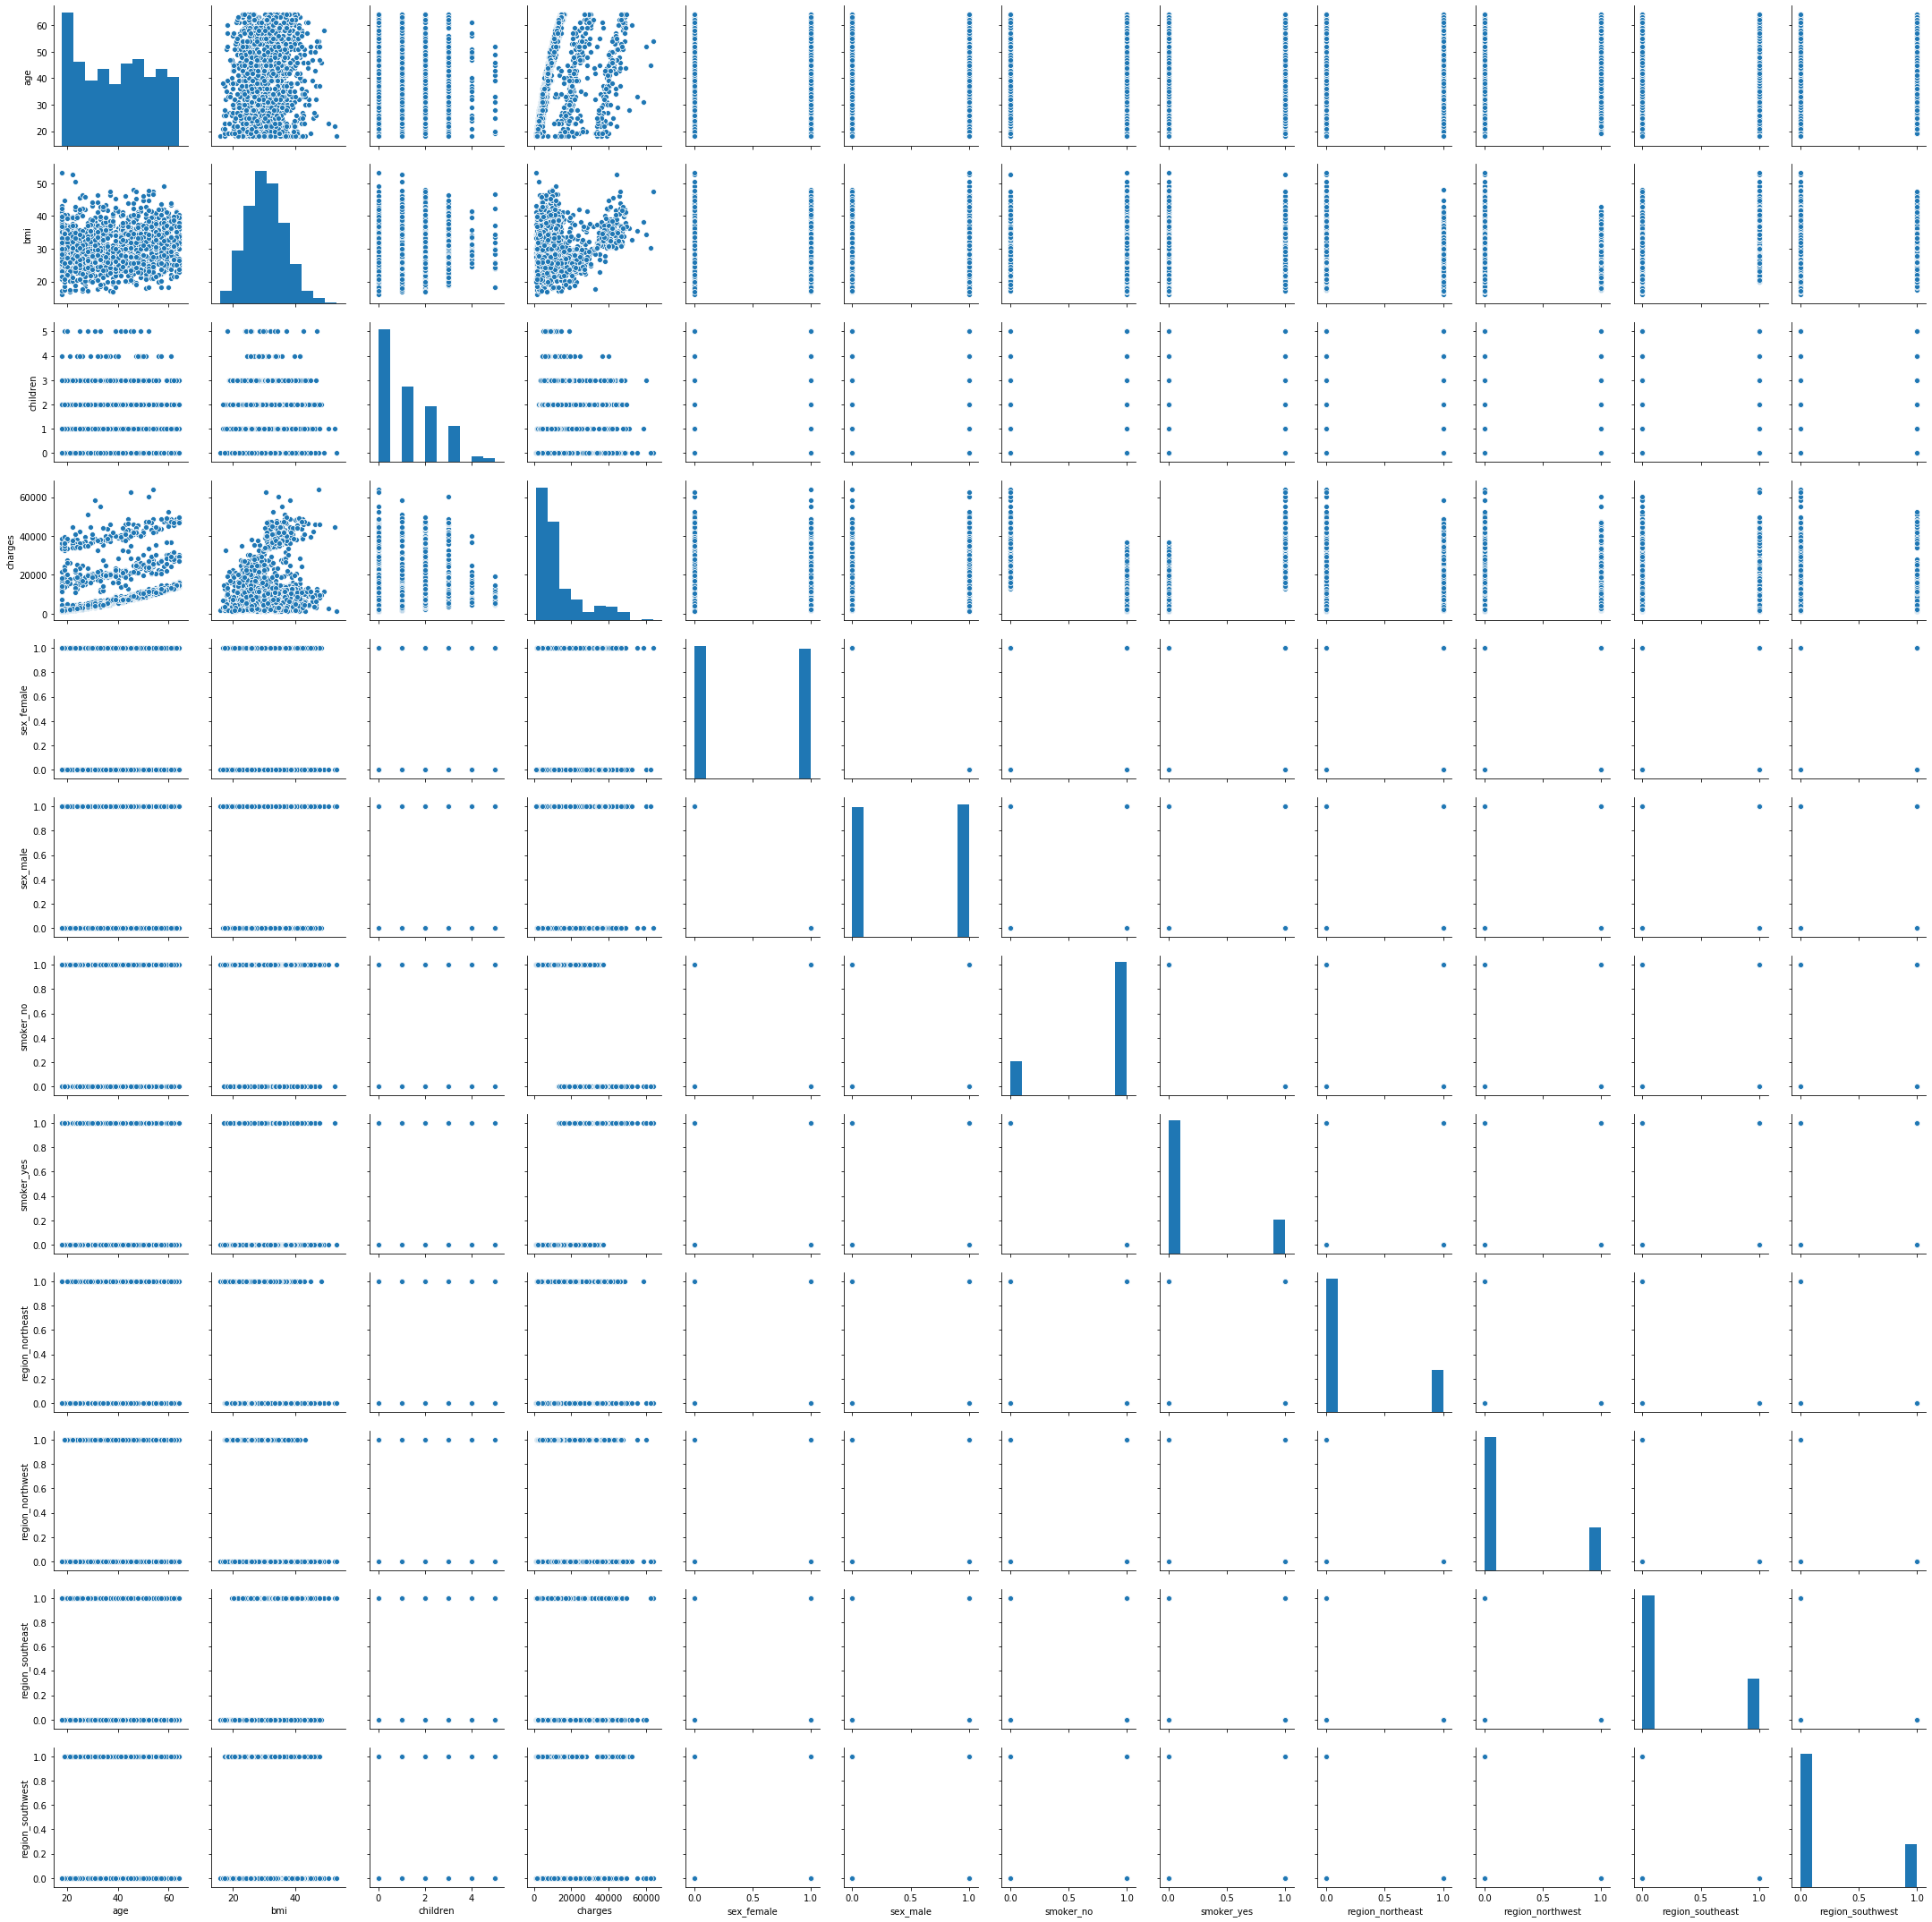

In [19]:
sns.pairplot(df)

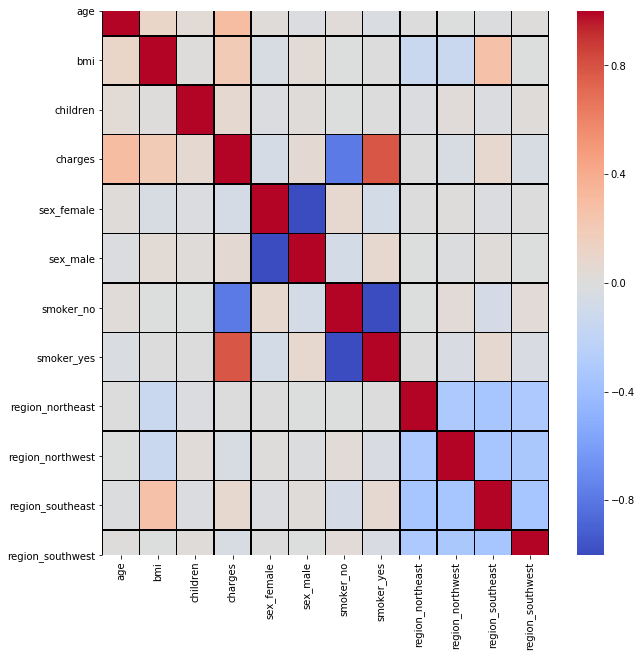

In [20]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=False,fmt='.2g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',linewidths=0.5, linecolor='black')

In [21]:
df[['age','charges','smoker_yes','smoker_no','sex_male','sex_female']].corr()

,age,charges,smoker_yes,smoker_no,sex_male,sex_female
age,1.000000,0.299008,-0.025019,0.025019,-0.020856,0.020856
charges,0.299008,1.000000,0.787251,-0.787251,0.057292,-0.057292
smoker_yes,-0.025019,0.787251,1.000000,-1.000000,0.076185,-0.076185
smoker_no,0.025019,-0.787251,-1.000000,1.000000,-0.076185,0.076185
sex_male,-0.020856,0.057292,0.076185,-0.076185,1.000000,-1.000000
sex_female,0.020856,-0.057292,-0.076185,0.076185,-1.000000,1.000000


In [22]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [23]:
lm1=smf.ols(formula='charges~ age+bmi+children+sex_female+sex_male+smoker_no+smoker_yes+region_northeast+region_northwest+region_southeast+region_southwest',data=df).fit()
print(lm1.params)
print(lm1.summary())

Intercept            -296.416764
age                   256.856353
bmi                   339.193454
children              475.500545
sex_female            -82.551203
sex_male             -213.865562
smoker_no          -12072.475653
smoker_yes          11776.058889
region_northeast      512.905044
region_northwest      159.941144
region_southeast     -522.117005
region_southwest     -447.145947
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:33:25   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    132

### Droppped below feature due to higher P-value >0.05:
1. sex_female 
2. region_northwest

### Below feture also we can drop and cause co-relation of this variable with this output is very low 

1. region_northwest
2. region_southwest
3. region_northeast
4. region_southeast


In [24]:
lm2=smf.ols(formula='charges~ age+bmi+children+sex_male+smoker_no+smoker_yes',data=df).fit()
print(lm2.params)
print(lm2.summary())

Intercept       -93.843814
age             257.734988
bmi             322.364214
children        474.411121
sex_male       -128.639854
smoker_no    -11958.618172
smoker_yes    11864.774359
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:33:25   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
      

### Drop sex_male as P value>0.05

In [25]:
lm3=smf.ols(formula='charges~ age+bmi+children+smoker_no+smoker_yes',data=df).fit()
print(lm3.params)
print(lm3.summary())

Intercept      -131.379627
age             257.849507
bmi             321.851402
children        473.502316
smoker_no    -11971.389736
smoker_yes    11840.010109
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:33:25   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err 

In [48]:
x=df.drop('charges',axis=1).values

In [49]:
x

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [97]:
x.shape

(1338, 11)

In [ ]:
 type(x)

In [75]:
y=df['charges'].values

In [76]:
type(y)

numpy.ndarray

In [77]:
x.shape

(1338, 11)

In [78]:
y.shape

(1338,)

In [126]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0) 

In [127]:
xtrain

array([[37.  , 34.1 ,  4.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 34.43,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [23.  , 36.67,  2.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [40.  , 25.08,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [19.  , 35.53,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [33.  , 18.5 ,  1.  , ...,  0.  ,  0.  ,  1.  ]])

In [128]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain[:,0:3]=sc.fit_transform(xtrain[:,0:3])
xtest[:,0:3]=sc.transform(xtest[:,0:3])

In [129]:
xtrain[0]

array([-0.14853305,  0.54530479,  2.41394802,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ])

In [130]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
print(lm.intercept_)
print(lm.coef_)

20195.520898814288
[ 3.57251875e+03  2.07745794e+03  5.28603986e+02  7.73186394e+00
 -7.73186394e+00 -1.18025086e+04  1.18025086e+04  4.83840068e+02
  2.23707336e+02 -4.29438766e+02 -2.78108638e+02]


In [132]:
ypred1=lm.predict(xtest)

In [136]:
ypred

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

In [138]:
data={'ypred':ypred,'yactual':ytest}

df1=pd.DataFrame(data,columns=['ypred','yactual'])

In [122]:
df1

,ypred,yactual
0,11169.927119,9724.53000
1,9486.709085,8547.69130
2,38181.123053,45702.02235
3,16266.313289,12950.07120
4,6914.648007,9644.25250
...,...,...
263,14760.230968,15019.76005
264,8277.984346,6664.68595
265,16149.973370,20709.02034
266,32904.758143,40932.42950


In [123]:
from sklearn.metrics import r2_score,mean_squared_error

In [124]:
r2_score(ytest,ypred)

0.7999876970680433

In [125]:
mean_squared_error(ytest,ypred)

31827950.229523845

In [96]:
## If i drop Region column
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [103]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [151]:
x1=df.drop(['charges','region_northeast','region_northwest','region_southeast','region_southwest'],axis=1)

In [152]:
x1

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,1,1,0
2,28,33.000,3,0,1,1,0
3,33,22.705,0,0,1,1,0
4,32,28.880,0,0,1,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0
1334,18,31.920,0,1,0,1,0
1335,18,36.850,0,1,0,1,0
1336,21,25.800,0,1,0,1,0


In [144]:
y1=df['charges'].values

In [145]:
from sklearn.model_selection import train_test_split
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=0) 

In [146]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1train[:,0:3]=sc.fit_transform(x1train[:,0:3])
x1test[:,0:3]=sc.transform(x1test[:,0:3])

In [147]:
x1train

array([[-0.14853305,  0.54530479,  2.41394802, ...,  1.        ,
         0.        ,  1.        ],
       [-1.49780784,  0.59867181, -0.89219519, ...,  1.        ,
         1.        ,  0.        ],
       [-1.14273553,  0.96092064,  0.76087642, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ...,  1.        ,
         1.        ,  0.        ],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.        ,
         1.        ,  0.        ],
       [-0.4325909 , -1.97749955, -0.06565939, ...,  0.        ,
         1.        ,  0.        ]])

In [148]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x1train,y1train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
ypred2=lm.predict(x1test)

In [154]:
from sklearn.metrics import r2_score,mean_squared_error

In [155]:
r2_score(y1test,ypred2)

0.7978644236809905

In [156]:
mean_squared_error(y1test,ypred2)

32165826.643605117